In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



original_train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data, val_data = train_test_split(original_train_data, test_size=0.2, random_state=42)

print("Train shape:", train_data.shape)
print("Validation shape:", val_data.shape)
print("Test shape:", test_data.shape)

train_data.head()


Train shape: (8708, 12)
Validation shape: (2178, 12)
Test shape: (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2815,2011-07-06 05:00:00,3,0,1,1,27.88,31.820,83,6.0032,5,30,35
8695,2012-08-04 16:00:00,3,0,0,1,36.90,40.910,39,19.9995,197,253,450
8406,2012-07-11 15:00:00,3,0,1,1,32.80,35.605,41,16.9979,56,220,276
1543,2011-04-10 04:00:00,2,0,0,2,14.76,18.180,93,7.0015,3,2,5
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,35,165,200


In [2]:
train_data = train_data.drop(columns=['casual', 'registered'])


In [3]:
val_data = val_data.drop(columns=['casual', 'registered'])


In [4]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
2815,2011-07-06 05:00:00,3,0,1,1,27.88,31.820,83,6.0032,35
8695,2012-08-04 16:00:00,3,0,0,1,36.90,40.910,39,19.9995,450
8406,2012-07-11 15:00:00,3,0,1,1,32.80,35.605,41,16.9979,276
1543,2011-04-10 04:00:00,2,0,0,2,14.76,18.180,93,7.0015,5
4952,2011-11-19 10:00:00,4,0,0,1,13.12,15.150,45,16.9979,200


In [5]:
val_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
3133,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,127
5786,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,13
5224,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,163
8953,2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,233
8054,2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,222


In [6]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train_data['count'] = np.log1p(train_data['count'])


In [8]:
val_data['count'] = np.log1p(val_data['count'])


In [9]:

predictor = TabularPredictor(label='count', verbosity=2).fit(
    train_data=train_data,
    presets='best_quality',
    time_limit=600 
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250729_213603"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 17 10:30:46 UTC 2025
CPU Count:          2
Memory Avail:       2.47 GB / 3.76 GB (65.6%)
Disk Space Avail:   3.61 GB / 4.99 GB (72.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to iden

(_ray_fit pid=6620) [1000]	valid_set's rmse: 1.01751
(_ray_fit pid=6687) [1000]	valid_set's rmse: 1.04587 [repeated 6x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=6687) [6000]	valid_set's rmse: 1.01846 [repeated 6x across cluster]
(_ray_fit pid=6721) [7000]	valid_set's rmse: 1.08065 [repeated 7x across cluster]
(_ray_fit pid=6767) [1000]	valid_set's rmse: 1.07878
(_ray_fit pid=6767) [2000]	valid_set's rmse: 1.06081
(_ray_fit pid=6767) [3000]	valid_set's rmse: 1.05128
(_ray_fit pid=6767) [4000]	valid_set's rmse: 1.04535
(_ray_fit pid=6767) [7000]	valid_set's rmse: 1.04381 [repeated 6x across cluster]
(_ray_fit pid=6843) [1000]	valid_set's rmse: 1.08319 [repeated 5x across cluster]
(_ray_fit pid=6874) [2000]	valid_set's rmse: 1.08928 [repeated 3x across cluster]


(_dystack pid=6481) 	-1.0581	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6481) 	54.65s	 = Training   runtime
(_dystack pid=6481) 	6.52s	 = Validation runtime
(_dystack pid=6481) Fitting model: LightGBM_BAG_L1 ... Training model for up to 35.30s of the 83.50s of remaining time.
(_dystack pid=6481) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.60%)


(_ray_fit pid=6912) [1000]	valid_set's rmse: 1.02339 [repeated 3x across cluster]
(_ray_fit pid=6972) [1000]	valid_set's rmse: 1.0082
(_ray_fit pid=6972) [2000]	valid_set's rmse: 1.0072
(_ray_fit pid=7043) [1000]	valid_set's rmse: 1.13855
(_ray_fit pid=7042) [1000]	valid_set's rmse: 1.06255


(_dystack pid=6481) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_dystack pid=6481) I0000 00:00:1753825057.805615    6540 chttp2_transport.cc:1182] ipv4:169.255.255.2:46393: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-07-29T21:37:37.8045287+00:00", http2_error:2, grpc_status:14}


(_ray_fit pid=7114) [1000]	valid_set's rmse: 1.07299 [repeated 2x across cluster]


(_dystack pid=6481) 	-1.0597	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6481) 	26.51s	 = Training   runtime
(_dystack pid=6481) 	1.08s	 = Validation runtime
(_dystack pid=6481) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 5.35s of the 53.55s of remaining time.
(_dystack pid=6481) /opt/conda/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=6481)   warnings.warn(
(_dystack pid=6481) 	-0.947	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6481) 	10.9s	 = Training   runtime
(_dystack pid=6481) 	0.49s	 = Validation runtime
(_dystack pid=6481) Fitting model: WeightedEnsemble_L2 ... Training model for up to 144.58s of the 41.71s of remaining time.
(_dystack pid=6481) 	Ensemble Weights: {'KNeighborsDis

(_ray_fit pid=7253) [1000]	valid_set's rmse: 0.593637 [repeated 2x across cluster]
(_ray_fit pid=7385) [1000]	valid_set's rmse: 0.558899
(_ray_fit pid=7387) [1000]	valid_set's rmse: 0.515225


(_dystack pid=6481) 	-0.5525	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6481) 	24.89s	 = Training   runtime
(_dystack pid=6481) 	0.65s	 = Validation runtime
(_dystack pid=6481) Fitting model: LightGBM_BAG_L2 ... Training model for up to 13.65s of the 13.63s of remaining time.
(_dystack pid=6481) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.79%)
(_dystack pid=6481) 	-0.5339	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6481) 	21.32s	 = Training   runtime
(_dystack pid=6481) 	0.12s	 = Validation runtime
(_dystack pid=6481) I0000 00:00:1753825129.342295    6539 chttp2_transport.cc:1182] ipv4:169.255.255.2:37857: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2025-07-29T21:38:49.342291722+00:00"}
(_dystack pid=6481) Fitting model: WeightedEnsemble_L3 ... Training model for up to

In [24]:
predictor_v3 = TabularPredictor(label='count', path='models/tuned_model/').fit(
    train_data,
    hyperparameters={
        'GBM': {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
        'CAT': {}, 'XGB': {}
    }
)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 17 10:30:46 UTC 2025
CPU Count:          2
Memory Avail:       1.48 GB / 3.76 GB (39.4%)
Disk Space Avail:   2.72 GB / 4.99 GB (54.6%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and bench

[1000]	valid_set's rmse: 1.08096
[2000]	valid_set's rmse: 1.07328
[3000]	valid_set's rmse: 1.06969
[4000]	valid_set's rmse: 1.06634
[5000]	valid_set's rmse: 1.06503
[6000]	valid_set's rmse: 1.06501
[7000]	valid_set's rmse: 1.06461


	-1.0639	 = Validation score   (-root_mean_squared_error)
	6.58s	 = Training   runtime
	0.67s	 = Validation runtime
Fitting model: CatBoost ...
	-1.0465	 = Validation score   (-root_mean_squared_error)
	50.68s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-1.0435	 = Validation score   (-root_mean_squared_error)
	1.68s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'XGBoost': 0.5, 'CatBoost': 0.333, 'LightGBMXT': 0.167}
	-1.035	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 60.61s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1229.2 rows/s (871 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter/models/tuned_model")


In [10]:
#predictor.feature_importance(val_data)


In [11]:

val_predictions = predictor.predict(val_data)

rmse = np.sqrt(mean_squared_error(val_data['count'], val_predictions))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 0.49


In [12]:
predictions = predictor.predict(test_data)
print(predictions)

0       3.097729
1       3.637753
2       3.755775
3       3.929658
4       3.945203
          ...   
6488    5.597374
6489    5.597374
6490    5.627162
6491    5.599579
6492    5.566166
Name: count, Length: 6493, dtype: float32


In [29]:
predictions_v3 = predictor_v3.predict(test_data)


In [13]:
mean_count = train_data['count'].mean()
baseline_preds = [mean_count] * len(val_data)
baseline_rmse = np.sqrt(mean_squared_error(val_data['count'], baseline_preds))
print(f"Baseline RMSE: {baseline_rmse:.2f}")


Baseline RMSE: 1.43


In [14]:
print("Min:", train_data['count'].min())
print("Max:", train_data['count'].max())
print("Mean:", train_data['count'].mean())


Min: 0.6931471805599453
Max: 6.878326468291324
Mean: 4.593780262481976


In [36]:

r2 = r2_score(val_data['count'], val_predictions)
print(f"R² Score: {r2:.2%}")


R² Score: 88.14%


In [28]:
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(val_data['count'], val_predictions))
print("RMSLE:", rmsle)

RMSLE: 0.12713688955659389


In [16]:
print(predictor.feature_metadata.get_features())


['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'datetime', 'datetime.year', 'datetime.month', 'datetime.day', 'datetime.dayofweek']


In [30]:
submission = pd.read_csv('sampleSubmission.csv')


submission['count'] = np.expm1(predictions_v3).round().astype(int)

submission.to_csv('submission.csv', index=False)

<Axes: xlabel='model'>

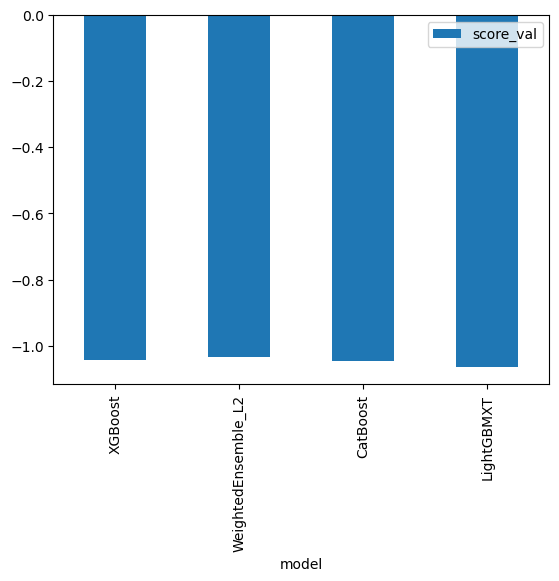

In [33]:
leaderboard = predictor_v3.leaderboard(train_data, silent=True)
leaderboard.plot.bar(x='model', y='score_val')


In [32]:
print(leaderboard.columns)


Index(['model', 'score_test', 'score_val', 'eval_metric', 'pred_time_test',
       'pred_time_val', 'fit_time', 'pred_time_test_marginal',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')


In [34]:
print(leaderboard[['model', 'score_val']].sort_values('score_val', ascending=False))


                 model  score_val
1  WeightedEnsemble_L2  -1.035018
0              XGBoost  -1.043495
2             CatBoost  -1.046465
3           LightGBMXT  -1.063907


<Axes: title={'center': 'Model Test Scores'}, xlabel='model'>

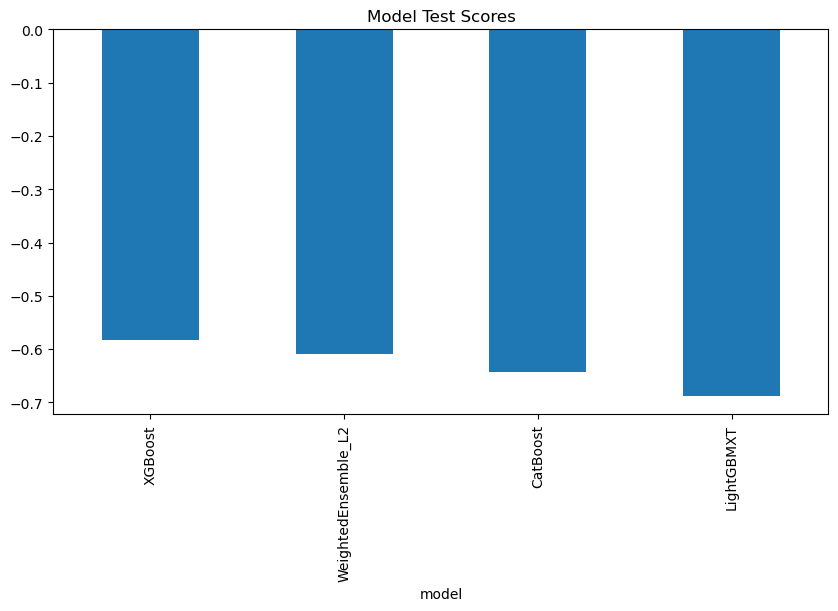

In [35]:
leaderboard.plot.bar(x='model', y='score_test', figsize=(10, 5), legend=False, title="Model Test Scores")
